## K-Means

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64
(150, 6)
(150, 2)


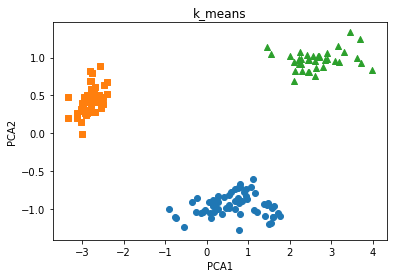

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def load_data():
    iris = load_iris()
    irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    irisDF['target'] = iris.target
    return irisDF
def k_means_clus(irisDF):
    kmeans = KMeans(init='random', n_clusters = 3, random_state = 100)
    kmeans.fit(irisDF.drop('target',axis=1))
    #print(kmeans.labels_)
    irisDF['cluster'] = kmeans.labels_
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    return iris_result, irisDF
def visualize(irisDF):
    
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(irisDF)
    print(irisDF.shape)
    print(pca_transformed.shape)
    
    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]
    
    idx_0 = irisDF[irisDF['cluster'] == 0].index
    idx_1 = irisDF[irisDF['cluster'] == 1].index
    idx_2 = irisDF[irisDF['cluster'] == 2].index
    
    fig, ax = plt.subplots()
    
    ax.scatter(x = irisDF.loc[idx_0,'pca_x'], y = irisDF.loc[idx_0,'pca_y'], 
               marker = 'o')
    ax.scatter(x = irisDF.loc[idx_1,'pca_x'], y = irisDF.loc[idx_1,'pca_y'], 
               marker = 's')
    ax.scatter(x = irisDF.loc[idx_2,'pca_x'], y = irisDF.loc[idx_2,'pca_y'], 
               marker = '^')
    ax.set_title('k_means')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
def main():
    irisDF = load_data()
    iris_result,irisDF = k_means_clus(irisDF)
    visualize(irisDF)
main()

## GNN

target  cluster
0       0          50
1       1          45
        2           5
2       2          50
Name: sepal length (cm), dtype: int64


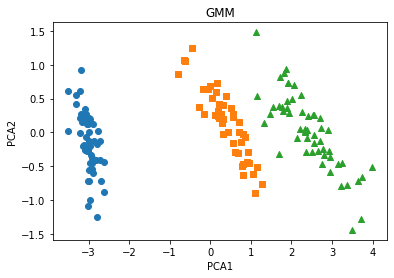

In [3]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def load_data():
    iris = load_iris()
    irisDF = pd.DataFrame(data = iris.data, columns=iris.feature_names)
    
    irisDF['target'] = iris.target
    return irisDF

def gmm_clus(irisDF):
    gmm = GaussianMixture(n_components=3, random_state= 100)
    gmm.fit(irisDF.drop('target', axis=1))
    
    irisDF['cluster'] = gmm.predict(irisDF.drop('target', axis=1))
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    return iris_result, irisDF

def Visualize(irisDF):
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(irisDF)
    
    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]
    
    idx_0 = irisDF[irisDF['cluster'] == 0].index
    idx_1 = irisDF[irisDF['cluster'] == 1].index
    idx_2 = irisDF[irisDF['cluster'] == 2].index
    
    fig, ax  = plt.subplots()
    
    ax.scatter(x = irisDF.loc[idx_0, 'pca_x'], y = irisDF.loc[idx_0, 'pca_y'],
              marker = 'o')
    ax.scatter(x = irisDF.loc[idx_1, 'pca_x'], y = irisDF.loc[idx_1, 'pca_y'],
              marker = 's')
    ax.scatter(x = irisDF.loc[idx_2, 'pca_x'], y = irisDF.loc[idx_2, 'pca_y'],
              marker = '^')
    ax.set_title('GMM')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    

def main():
    irisDF = load_data()
    iris_result, irisDF = gmm_clus(irisDF)
    Visualize(irisDF)
    
main()

### K-means vs GMM

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 300, n_features = 2,
                centers = 3, cluster_std = 0.8, random_state= 0)

#fig, ax = plt.subplots()
#ax.scatter(x = X[:,0],y=X[:,1])

transformation = [[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X,transformation)
#ax.scatter(x = X_aniso[:,0], y = X_aniso[:,1])

clusterDF = pd.DataFrame(data = X_aniso, columns=['ftr1','ftr2'])
clusterDF['target'] = y
target_list = np.unique(y)

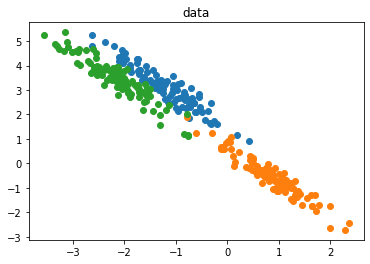

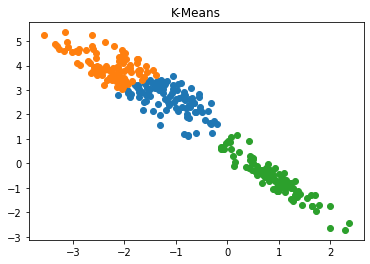

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 300, n_features = 2,
                centers = 3, cluster_std = 0.8, random_state= 0)

#fig, ax = plt.subplots()
#ax.scatter(x = X[:,0],y=X[:,1])

transformation = [[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X,transformation)
#ax.scatter(x = X_aniso[:,0], y = X_aniso[:,1])

clusterDF = pd.DataFrame(data = X_aniso, columns=['ftr1','ftr2'])
clusterDF['target'] = y
target_list = np.unique(y)
#print(target_list)
#print(clusterDF)

def data_visualize():
    fig, ax = plt.subplots()
    plt.title('data')
    
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target'] == target]
        ax.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'])

def K_means():
    k_means = KMeans(init='random', n_clusters = 3, random_state = 0)
    kmeans_label = k_means.fit(X_aniso).labels_
    clusterDF['kmeans_label']=kmeans_label
    center = k_means.cluster_centers_
    
    unique_labels = np.unique(kmeans_label)
    fig, ax = plt.subplots()
    plt.title('K-Means')
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
        center_x_y = center[label]
        ax.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
        
        
    

def main():
    data_visualize()
    K_means()
#    GMM()
    
main()

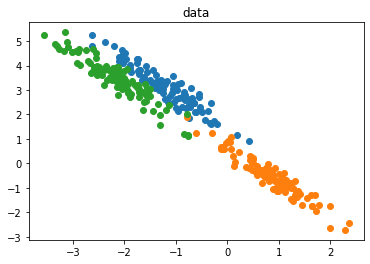

K-means Clustering
target  kmeans_label
0       0               67
        1               31
        2                2
1       2               97
        0                3
2       1               67
        0               33
Name: kmeans_label, dtype: int64


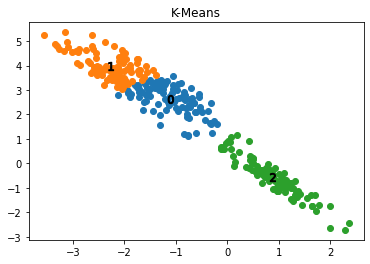

Gaussian Mixture Model
target  gmm_label
0       2            100
1       1             98
        2              2
2       0             92
        2              8
Name: gmm_label, dtype: int64


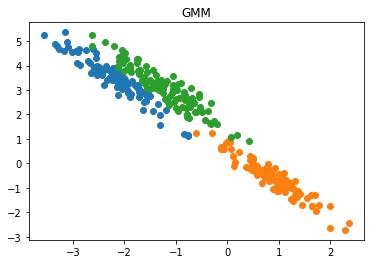

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 300, n_features = 2,
                centers = 3, cluster_std = 0.8, random_state= 0)

#fig, ax = plt.subplots()
#ax.scatter(x = X[:,0],y=X[:,1])

transformation = [[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X,transformation)
#ax.scatter(x = X_aniso[:,0], y = X_aniso[:,1])

clusterDF = pd.DataFrame(data = X_aniso, columns=['ftr1','ftr2'])
clusterDF['target'] = y
target_list = np.unique(y)
#print(target_list)
#print(clusterDF)

def data_visualize():
    fig, ax = plt.subplots()
    plt.title('data')
    
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target'] == target]
        ax.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'])
    plt.show()

def K_means():
    k_means = KMeans(init='random', n_clusters = 3, random_state = 0)
    kmeans_label = k_means.fit(X_aniso).labels_
    clusterDF['kmeans_label']=kmeans_label
    center = k_means.cluster_centers_
    
    unique_labels = np.unique(kmeans_label)
    fig, ax = plt.subplots()
    plt.title('K-Means')
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
        center_x_y = center[label]
        ax.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
        ax.scatter(x = center_x_y[0], y = center_x_y[1],
                  s = 70, color='k', marker = '$%d$' % label)
    print("K-means Clustering")
    print(clusterDF.groupby('target')['kmeans_label'].value_counts())
    plt.show()
        
def GMM():
    
    gmm = GaussianMixture(n_components = 3, random_state = 0)
    gmm_label = gmm.fit_predict(X_aniso)
    clusterDF['gmm_label'] = gmm_label
    
    unique_labels = np.unique(gmm_label)
    
    fig, ax = plt.subplots()
    
    plt.title('GMM')
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['gmm_label'] == label]
        plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
        
    print("Gaussian Mixture Model")
    print(clusterDF.groupby('target')['gmm_label'].value_counts())
    plt.show()

def main():
    data_visualize()
    K_means()
    GMM()
    
main()